In [1]:
import numpy as np
import os
import SimpleITK as sitk
import matplotlib.pyplot as plt
import matplotlib
import random
%matplotlib inline 

In [2]:
predictions_dir_path = '../predictions'
lists_dir = './lists/lists_cbis_ddsm'

In [3]:
exps = os.listdir(predictions_dir_path)
print(exps)

['TU_CBIS-DDSM224']


In [4]:
exp_name = exps[0]
runs = os.listdir(os.path.join(predictions_dir_path,exp_name))
print(runs)

['TU_pretrain_R50-ViT-B_16_skip3_bs24_224']


In [5]:
saved_images_dir = runs[0]
saved_images_dir = os.path.join(predictions_dir_path,exp_name,saved_images_dir)
print(saved_images_dir)

../predictions\TU_CBIS-DDSM224\TU_pretrain_R50-ViT-B_16_skip3_bs24_224


In [6]:
test_ids_list = open(os.path.join(lists_dir, 'test_vol.txt')).readlines()
test_log = open('test_local.log').readlines()

In [7]:
def search_log(search_term, test_log=test_log):
    for line in test_log:
        if search_term in line:
            arr = line.strip('\n')
            return arr.split()

In [8]:
print(search_log('idx 1'))

['idx', '1', 'case', 'Mass-Test_P_00016_LEFT_MLO', 'mean_dice', '0.743816', 'mean_hd95', '3.605551']


In [9]:
a = search_log('idx 40 ')
a[7]
round(float(a[7]),2)

223.48

In [10]:
def get_pred(idx, test_ids_list=test_ids_list):
    slice_name = test_ids_list[idx].strip('\n')
    img_path = os.path.join(saved_images_dir, slice_name+'_img.nii.gz')
    pred_path = os.path.join(saved_images_dir, slice_name+'_pred.nii.gz')
    gt_path = os.path.join(saved_images_dir, slice_name+'_gt.nii.gz')
    
    img = np.squeeze(sitk.GetArrayFromImage(sitk.ReadImage(img_path)))
    pred = np.squeeze(sitk.GetArrayFromImage(sitk.ReadImage(pred_path)))
    gt = np.squeeze(sitk.GetArrayFromImage(sitk.ReadImage(gt_path)))
    
    return img, gt, pred, slice_name

In [11]:
img, gt, pred, slice_name = get_pred(1)
for i in [img, pred ,gt]:
    print(i.shape)

(512, 512)
(512, 512)
(512, 512)


In [12]:
print(test_log[-1])

Testing performance in best val model: mean_dice : 0.376653 mean_hd95 : 43.129290



In [13]:
def disp_overlay_masks(img, gt, pred, slice_name):
    cmap1 = matplotlib.colors.ListedColormap(['none', 'green'])
    cmap2 = matplotlib.colors.ListedColormap(['none', 'red'])
    
    print(slice_name)
    metrics = search_log(slice_name)
    print(*metrics[0:4], sep=' ')
    print(*metrics[4:], sep=' ')
    
    
    plt.figure(figsize=(7,7))
    plt.title(slice_name + ', dice: ' + str(round(float(metrics[5]),2)) + ', hd: ' + str(round(float(metrics[7]),2)))
    plt.text(0.7, 0.03, 'ground_truth: green\nprediction: red', size=10, transform=plt.gca().transAxes, color='w')
    plt.imshow(img, 'gray', interpolation='none')
    plt.imshow(gt, cmap1, interpolation='none', alpha=0.5)
    plt.imshow(pred, cmap2, interpolation='none', alpha=0.5)
    plt.show()

Mass-Test_P_01395_RIGHT_CC
idx 273 case Mass-Test_P_01395_RIGHT_CC
mean_dice 0.468085 mean_hd95 7.211103


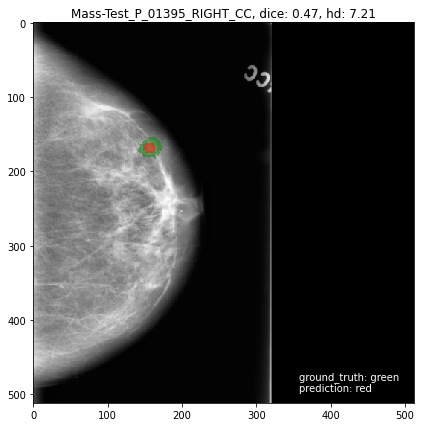

Mass-Test_P_01797_LEFT_MLO
idx 348 case Mass-Test_P_01797_LEFT_MLO
mean_dice 0.000000 mean_hd95 114.000000


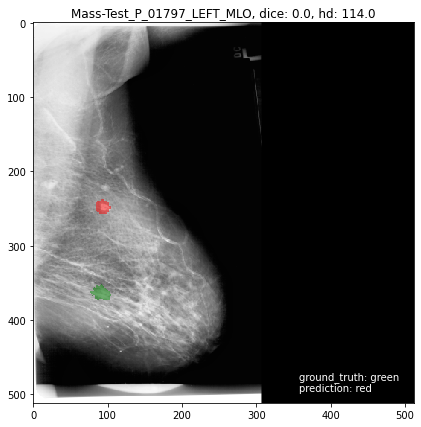

Mass-Test_P_01666_RIGHT_MLO
idx 320 case Mass-Test_P_01666_RIGHT_MLO
mean_dice 0.750359 mean_hd95 90.770577


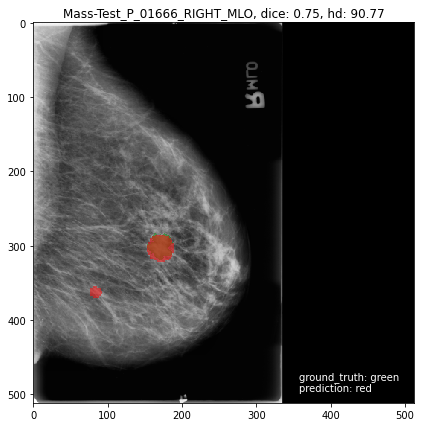

Mass-Test_P_00194_RIGHT_CC
idx 38 case Mass-Test_P_00194_RIGHT_CC
mean_dice 0.806588 mean_hd95 9.219544


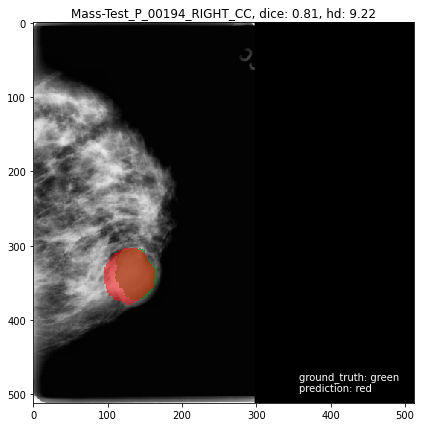

Mass-Test_P_01787_LEFT_MLO
idx 342 case Mass-Test_P_01787_LEFT_MLO
mean_dice 0.741803 mean_hd95 3.000000


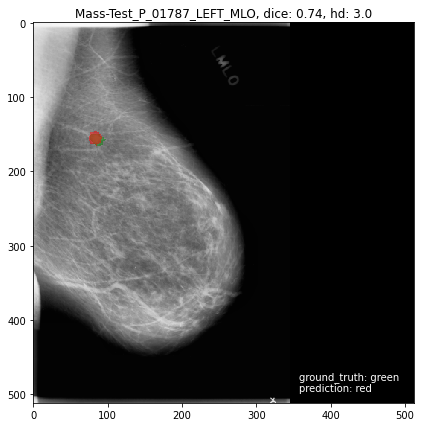

In [14]:
total_ids = len(test_ids_list)

for i in range(5):
    idx = random.randint(0, total_ids-1)
    img, gt, pred, slice_name = get_pred(idx)
    disp_overlay_masks(img, gt, pred, slice_name)

In [15]:
print(test_log[-5])

idx 358 case Mass-Test_P_01865_LEFT_MLO mean_dice 0.494908 mean_hd95 8.000000



In [16]:
a = search_log('01044')
print(a)

['idx', '211', 'case', 'Mass-Test_P_01044_LEFT_MLO', 'mean_dice', '0.000000', 'mean_hd95', '127.126510']


Mass-Test_P_01044_LEFT_MLO
idx 211 case Mass-Test_P_01044_LEFT_MLO
mean_dice 0.000000 mean_hd95 127.126510


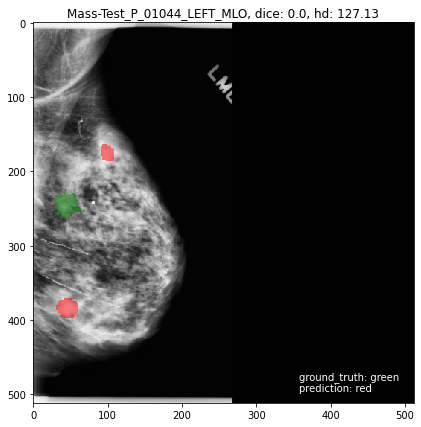

In [17]:
disp_overlay_masks(*get_pred(int(a[1])))

In [18]:
dices= []
hds = []

for i in range(361):
    metrics = search_log('idx ' + str(i) +' ')
    dices.append(round(float(metrics[5]),2))
    hds.append(round(float(metrics[7]),2))

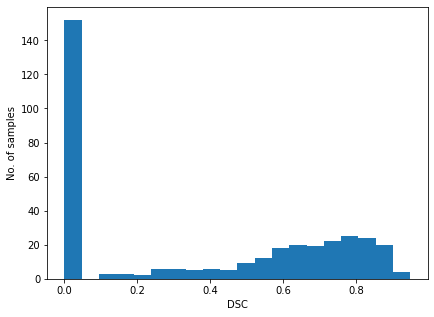

In [31]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
# plt.title('DSC histogram')
plt.hist(dices, bins=20)
plt.xlabel("DSC")
plt.ylabel("No. of samples")

# plt.subplot(1,2,2)
# plt.title('Hd hist')
# plt.hist(hds, bins=20)
plt.show()

In [20]:
# cmap1 = matplotlib.colors.ListedColormap(['none', 'green'])
# cmap2 = matplotlib.colors.ListedColormap(['none', 'red'])

# plt.figure(figsize=(12,12))
# plt.subplot(1,2,1)
# plt.title('gt')
# plt.imshow(img, 'gray', interpolation='none')
# plt.imshow(gt, cmap1, interpolation='none', alpha=0.7)
# plt.subplot(1,2,2)
# plt.title('pred')
# plt.imshow(img, 'gray', interpolation='none')
# plt.imshow(pred, cmap2, interpolation='none', alpha=0.7)
# plt.show()